### Replication : Long Digital

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from configuration import ConfigurationBuilder
from pricing import BlackScholesMerton, GeometricBrownianMotion

In [2]:
configuration = ConfigurationBuilder(
    kind='call',
    spot=100.0,
    sigma=0.30,
    maturity=365,
    risk_free_rate=0,
    dividend_yield=0,
)

#### With Black Scholes Merton

In [3]:
barrier = configuration.spot
shift = 1

configuration.strike = barrier - shift
option_1 = BlackScholesMerton(configuration)

configuration.strike = barrier 
option_2 = BlackScholesMerton(configuration)

In [4]:
digital = option_1 - option_2

In [5]:
print('price', abs(digital.price()))
print('delta', digital.delta())
print('gamma', digital.gamma())
print('vega', digital.vega())
print('theta', digital.theta())
print('rho', digital.rho())

price 0.4469894253974118
delta 0.013179887406931323
gamma -7.325160203117825e-05
vega -0.0021975480609353615
theta 9.031019428501486e-05
rho 0.00870999315295723


#### With Geometric Brownian Motion

In [6]:
configuration.strike = configuration.spot
configuration.simulation = 10000
configuration.steps = 365
gbm_pricing = GeometricBrownianMotion(configuration)
gbm_pricing.run_simulation()

In [7]:
gbm_pricing.digital()

0.4448

### Sensitivity : Digital

In [8]:
# For spot between 10 and 190

data = pd.DataFrame(columns=['price', 'delta', 'gamma', 'vega', 'theta', 'rho'])

for i in range(10, 190):
    
    configuration.spot = i
    
    configuration.strike = barrier - shift
    option_1 = BlackScholesMerton(configuration)

    configuration.strike = barrier 
    option_2 = BlackScholesMerton(configuration)
    
    digital = option_1 - option_2
    
    data.loc[i] = (abs(digital.price()), digital.delta(), digital.gamma(), digital.vega(), digital.theta(), digital.rho())

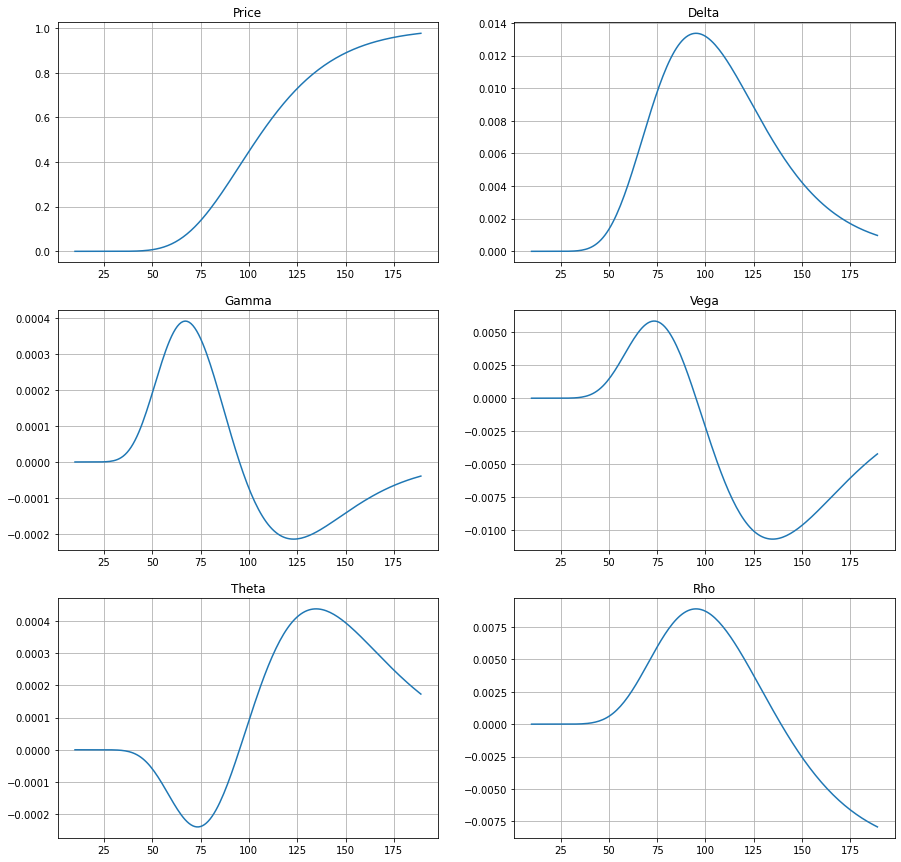

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2)
data["price"].plot(ax=axes[0,0], title='Price', grid='gca')
data["delta"].plot(ax=axes[0,1], title='Delta', grid='gca')
data["gamma"].plot(ax=axes[1,0], title='Gamma', grid='gca')
data["vega"].plot(ax=axes[1,1], title='Vega', grid='gca')
data["theta"].plot(ax=axes[2,0], title='Theta', grid='gca')
data["rho"].plot(ax=axes[2,1], title='Rho', grid='gca')
fig.set_figheight(15)
fig.set_figwidth(15)